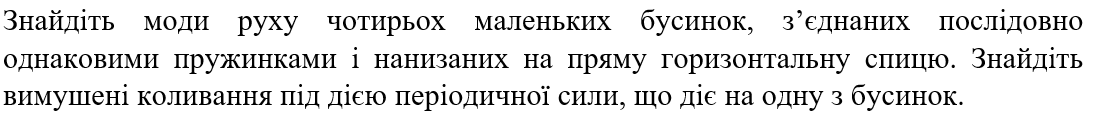

In [43]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [44]:
t = var("t")
N = 4
x = []
X = []
m = var("m")
v = []
V = []
for i in range(N):
    #exec(preparse("m_" + str(i) + " = var(\"m_" + str(i) + "\""")"))
    exec(preparse("X_" + str(i) + " = var(\"x_" + str(i) + "\""")"))
    exec(preparse("V_" + str(i) + " = var(\"v_" + str(i) + "\""")"))
    exec(preparse("x_" + str(i) + " = function(\"x_" + str(i) + "\""")(t)"))
    exec(preparse("v_" + str(i) + " = function(\"v_" + str(i) + "\""")(t)"))
    #exec(preparse("m += [m_" + str(i) + "]"))
    exec(preparse("x += [x_" + str(i) + "]"))
    exec(preparse("X += [X_" + str(i) + "]"))
    exec(preparse("v += [v_" + str(i) + "]"))
    exec(preparse("V += [V_" + str(i) + "]"))

In [45]:
k = var("k")
#for i in range(N-1):
#    exec(preparse("k_" + str(i) + " = var(\"k_" + str(i) + "\""")"))
#    exec(preparse("k += [k_" + str(i) + "]"))

In [46]:
T = 0
for i in range(N):
    T += m * x[i].diff(t)^2/2
disp(T)

<IPython.core.display.Math object>

In [47]:
U = 0
for i in range(N-1):
    U += k * (x[i] - x[i+1])^2/2

disp(U)

<IPython.core.display.Math object>

In [48]:
L = T - U
disp(L)

<IPython.core.display.Math object>

обобщенные импульсы

$P = \frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial {v}}$

In [49]:
p = []
P = []
for i in range(N):
    p += [L.subs(x[i].diff(t) == V[i]).diff(V[i]).subs(V[i] == x[i].diff(t))]
    P += [L.subs(x[i].diff(t) == V[i]).diff(V[i]).subs(V[i] == v[i])]
disp(P)
disp(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Запишем уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial {x}} = 0$

In [50]:
# система уравнений Эйлера-Лагранжа
eqs = []
for i in range(N):
    eqs += [p[i].diff(t) - L.subs(x[i] == X[i]).diff(X[i]).subs(X[i] == x[i]).expand() == 0]
    disp(eqs[i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Выразим энергию через Лагранжиан

$E = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - L$

In [51]:

eqs2 = []
for i in range(N):
    eqs2 += [x[i].diff(t) == V[i]]
    disp(eqs2[i])

for i in range(N):
    eqs2 += [(P[i].diff(t) == L.subs(x[i] == X[i]).diff(X[i]).expand())/m]
    if i > 0:
        eqs2[i+N] = eqs2[i+N].subs(x[i-1] == X[i-1])
    if i < N - 1:
        eqs2[i+N] = eqs2[i+N].subs(x[i+1] == X[i+1])
    disp(eqs2[i+N])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [52]:
des = [de_i.rhs() for de_i in eqs2]
disp(des)

<IPython.core.display.Math object>

In [53]:
values = [
    k == 1,
    m == 1,
]

In [54]:
# делаем подстановку численных значений
f = [de_i.subs(values) for de_i in des]
disp(f)

<IPython.core.display.Math object>

In [55]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times = srange(0, 24.4, 0.01)

x0 = 0.1
dvars = X+V
ics=[0,0,0,0.01, 0,0,0,0]

sol = desolve_odeint(des=f, ics=ics, times=times, dvars=dvars, ivar=t)

In [119]:
colors = ["red", "green", "yellow", "blue"]

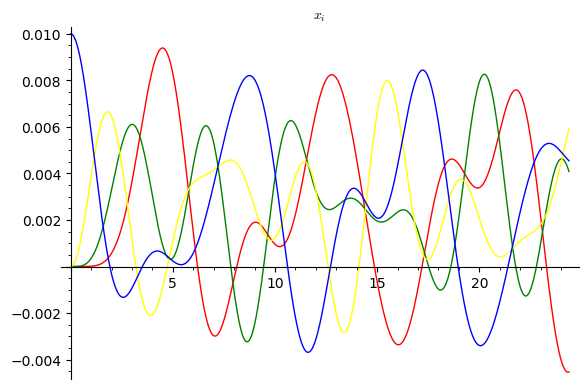

In [120]:
p  = line(zip(times,sol[:,0]), color=colors[0])
p += line(zip(times,sol[:,1]), color=colors[1])
p += line(zip(times,sol[:,2]), color=colors[2])
p += line(zip(times,sol[:,3]), color=colors[3])

p.show(title="$x_i$")

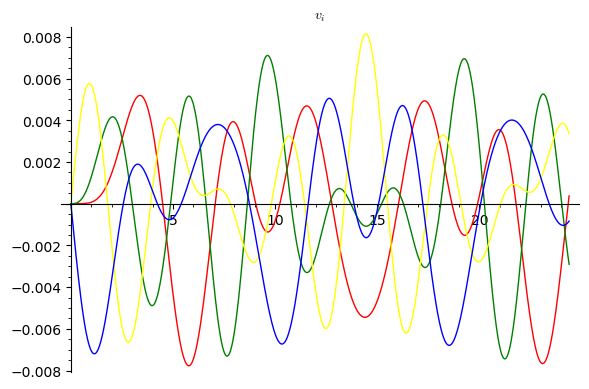

In [121]:
p  = line(zip(times,sol[:,4]), color=colors[0])
p += line(zip(times,sol[:,5]), color=colors[1])
p += line(zip(times,sol[:,6]), color=colors[2])
p += line(zip(times,sol[:,7]), color=colors[3])

p.show(title="$v_i$")

In [58]:
A = []
omega = var("omega")

for i in range(N):
    exec(preparse("A_"     + str(i) + " = var(\"A_"     + str(i) + "\""")"))
    exec(preparse("A      += [A_"     + str(i) + "]"))

In [59]:
# решение системы уравнений Эйлера-Лагранжа
# ищем в виде
xi = []
for i in range(N):
    xi += [A[i]*exp(I*omega*t)]
    disp(xi[i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [60]:
# подставляя решения в систему
# уравнений Эйлера Лагранжа
# получаем систему линейных алгебраичных уравнений
eqsi = []
for i in range(N):
    eq_i = eqs[i].substitute_function(x[i] == xi[i])
    if i > 0:
        eq_i = eq_i.subs(x[i-1] == xi[i-1])
    if i < N - 1:
        eq_i = eq_i.subs(x[i+1] == xi[i+1])
    
    eqsi += [ eq_i ]
    disp(eqsi[i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [61]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [38]:
M = GenerateMatrix(eqsi, A)
disp(M)

<IPython.core.display.Math object>

In [39]:
disp(xi)

<IPython.core.display.Math object>

In [40]:
M = GenerateMatrix(eqsi, xi)
disp(M)

<IPython.core.display.Math object>

In [41]:
det_M = M.det()
disp(det_M)

<IPython.core.display.Math object>

In [65]:
disp(det_M.factor())

<IPython.core.display.Math object>

In [64]:
sol_omega = solve(det_M == 0, omega)
for sol_omega_i in sol_omega:
    disp(sol_omega_i)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [66]:
values = [
    m == 1.0,
    k == 1.0,
]

In [67]:
for sol_omega_i in sol_omega:
    disp(sol_omega_i.subs(values))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

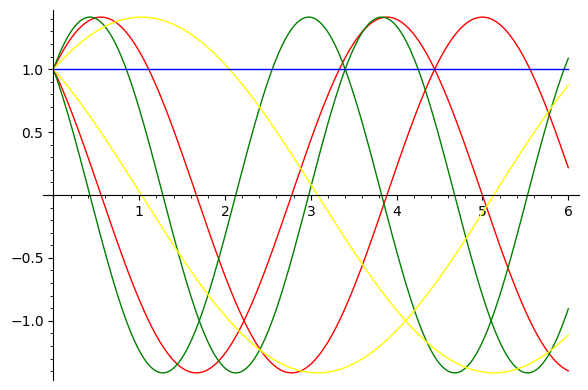

In [124]:
p = Graphics()
i = 0
for sol_omega_i in sol_omega:
    p += plot((cos(omega*t)+sin(omega*t)).subs(sol_omega_i.subs(values)), t, 0, 6, color=colors[i//2])
    
    i = i + 1
p.show()


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == -sqrt(2)*sqrt(k/m) is:


<IPython.core.display.Math object>

assuming that r134 is 1 we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

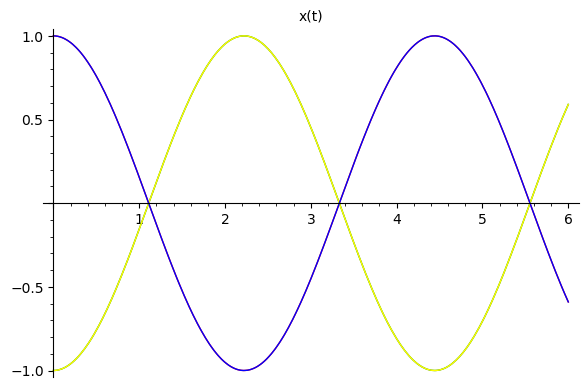


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == sqrt(2)*sqrt(k/m) is:


<IPython.core.display.Math object>

assuming that r135 is 1 we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

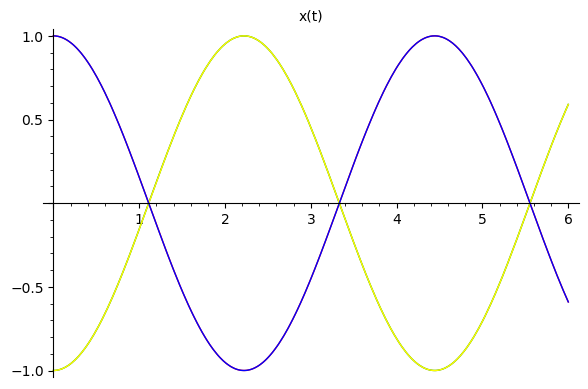


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == -sqrt(sqrt(2)*k/m + 2*k/m) is:


<IPython.core.display.Math object>

assuming that r136 is 1 we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

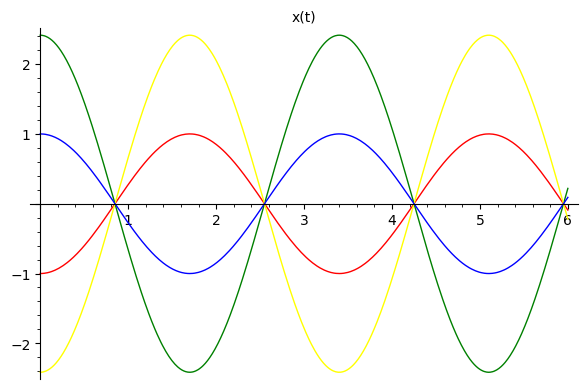


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == sqrt(sqrt(2)*k/m + 2*k/m) is:


<IPython.core.display.Math object>

assuming that r137 is 1 we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

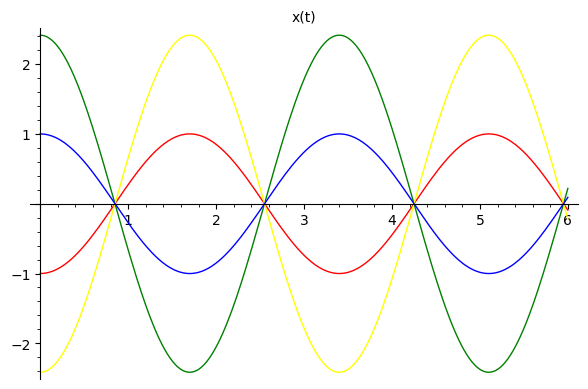


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == -sqrt(-sqrt(2)*k/m + 2*k/m) is:


<IPython.core.display.Math object>

assuming that r138 is 1 we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

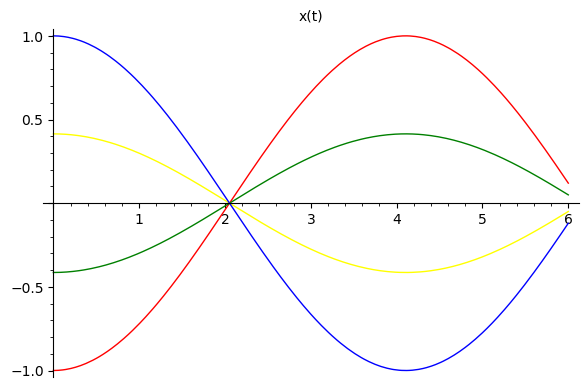


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == sqrt(-sqrt(2)*k/m + 2*k/m) is:


<IPython.core.display.Math object>

assuming that r139 is 1 we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

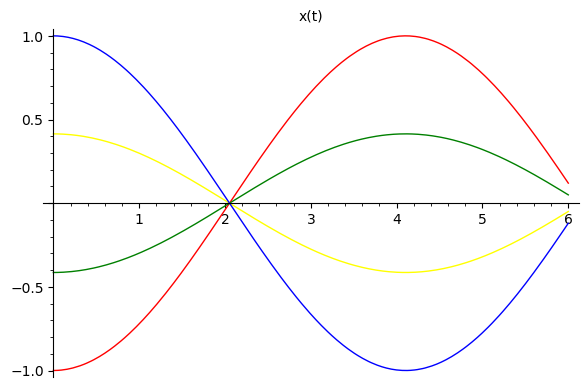


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == 0 is:


<IPython.core.display.Math object>

assuming that r140 is 1 we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

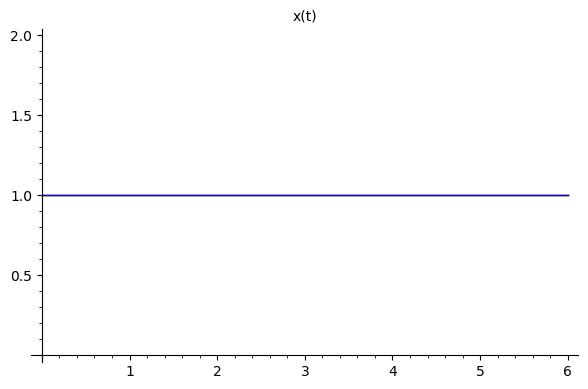

In [125]:
for sol_omega_i in sol_omega:
    print("")
    # решение системы уравнений Эйлера-Лагранжа в виде
    x_i = []
    for i in range(N):
        # с найденными выше частотами мод
        x_i += [A[i]*exp(I*sol_omega_i.rhs()*t)]
    print("using the following found frequency")
    disp(sol_omega_i)

    # подставляем решения в систему
    # уравнений Эйлера Лагранжа
    # получаем систему линейных алгебраичных уравнений
    # для коэффициентов A
    print("we have the following system for amplitude coefficients")
    eqs_i = []
    for i in range(N):
        eq_i = eqs[i].substitute_function(x[i] == x_i[i])
        if i > 0:
            eq_i = eq_i.subs(x[i-1] == x_i[i-1])
        if i < N - 1:
            eq_i = eq_i.subs(x[i+1] == x_i[i+1])
            
        eq_i = (eq_i / exp(I*sol_omega_i.rhs()*t) / k).full_simplify()

        eqs_i += [ eq_i ]
        disp(eqs_i[i])

    print("with determinant:")
    M = GenerateMatrix(eqs_i, A)
    disp(M)
    
    print("rank of this system is:")
    rank_M = M.rank()
    disp(rank_M)
    
    print("so I can eleminate", N, " - ", M.rank(), " = ", N -  M.rank(), "equations")

    eqs_A = []
    for i in range(rank_M):
        eqs_A += [eqs_i[i]]
    disp(eqs_A)
    
    print("And the solution for frequency", sol_omega_i,"is:")
    
    sol_A = solve(eqs_A, A)
    disp(sol_A)
    
    sol_A_independed_variable = sol_A[0][0].variables()[1]
    print("assuming that", sol_A_independed_variable, "is 1 we have:")
    
    for sol_A_i in sol_A[0]:
        disp(sol_A_i.subs(sol_A_independed_variable == 1))

    x_i_sol = []
    for i in range(N):
        # с найденными выше частотами мод
        x_i_sol += [x_i[i]]
        for sol_A_i in sol_A[0]:
            x_i_sol[i] = x_i_sol[i].subs(sol_A_i.subs(sol_A_independed_variable == 1))

    print("and the mode motion is:")
    disp(x_i_sol)
    
    p = Graphics()
    i = 0
    for x_i_sol_i in x_i_sol:
        p += plot((x_i_sol_i).subs(values).real(), t, 0, 6, color = colors[i])
        i = i + 1
    p.show(title="x(t)")